<style>
h1 {
  color: #0078d4
}
</style>
<h1>Clustering algorithms</h1>

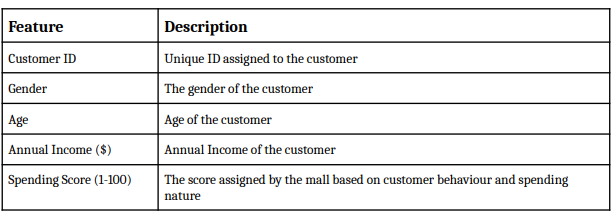

In [65]:
import pandas as pd
#Importing the dataset
df = pd.read_csv("mall_customers_dataset.csv", sep=';', header=1)

<style>
h3 {
 color: #0078d4
}
</style>
<h3>1. Load the dataset and perform exploratory data analysis (EDA).</h3>
<h3>2. Preprocess the data by calculating the number of rows and columns, number of
missing values, outliers, distribution means, medians, quantiles, scaling,
transformation, visualisation, etc.</h3>


<style>
h3 {
 color: #0078d4
}
</style>
<h3>Exploratory data analysis (EDA)</h3>



In [66]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [67]:
#printing info about columns
#it shows column names, number of rows, data types and number of null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income ($)       200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [68]:
#describe gives insight about data frame as  min and max, middle, and quartile values per column...
print(df.describe(include='all'))

        CustomerID  Gender         Age  Annual Income ($)  \
count   200.000000     200  200.000000         200.000000   
unique         NaN       2         NaN                NaN   
top            NaN  Female         NaN                NaN   
freq           NaN     112         NaN                NaN   
mean    100.500000     NaN   38.850000       60560.000000   
std      57.879185     NaN   13.969007       26264.721165   
min       1.000000     NaN   18.000000       15000.000000   
25%      50.750000     NaN   28.750000       41500.000000   
50%     100.500000     NaN   36.000000       61500.000000   
75%     150.250000     NaN   49.000000       78000.000000   
max     200.000000     NaN   70.000000      137000.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.000000  
25%

In [69]:
#those colors will be used to display plots
colors = ["#19647E", "#FF6F61", '#B7C3F3', '#DD7596', '#8EB897', '#F9CDAD', '#F8AFA8', '#A8D0E6', '#8A5575', '#D8B56B']

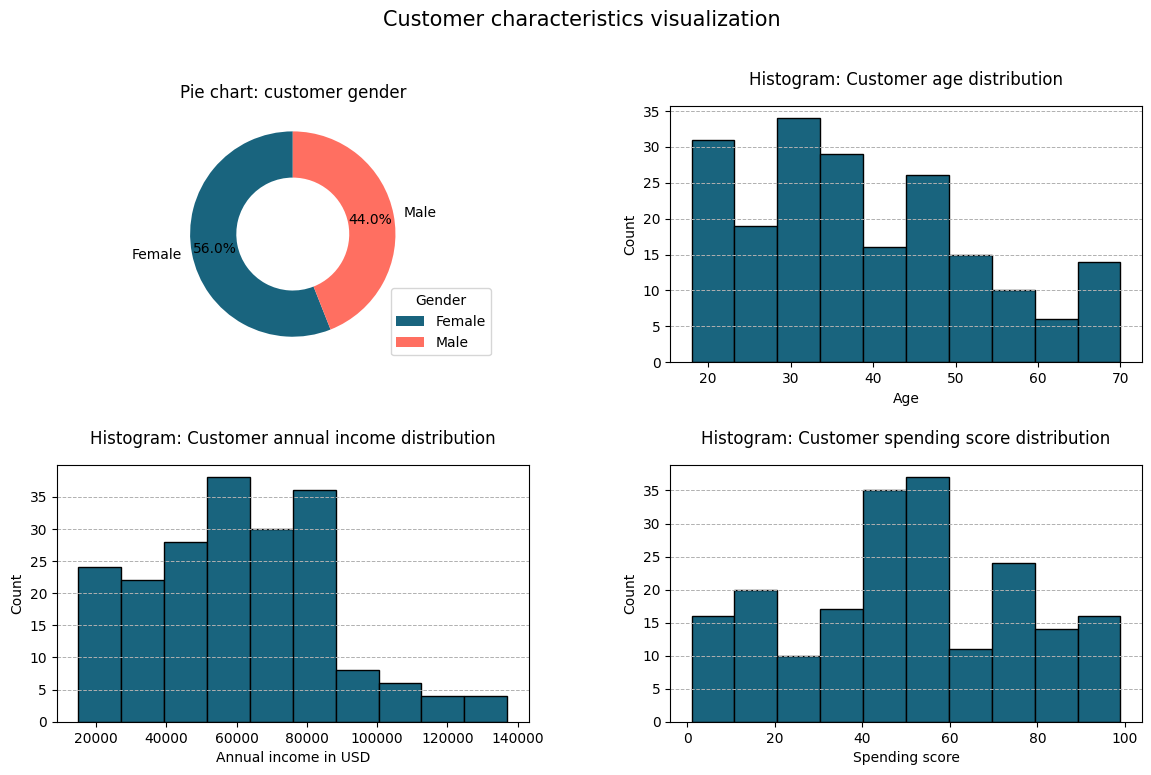

In [70]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()

#plotting gender on pie chart
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
axs[0].pie(df['Gender'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[0].set_title("Pie chart: customer gender")
axs[0].legend(title="Gender", loc='lower right', bbox_to_anchor=(1.3, 0))

#plotting age on histogram
axs[1].hist(df['Age'], bins=10, color=colors[0], edgecolor='black')
axs[1].set_title("Histogram: Customer age distribution", y=1.05)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Count")
axs[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) 

#plotting income on histogram
axs[2].hist(df['Annual Income ($)'], bins=10, color=colors[0], edgecolor='black')
axs[2].set_title("Histogram: Customer annual income distribution", y=1.05)
axs[2].set_xlabel("Annual income in USD")
axs[2].set_ylabel("Count")
axs[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

#plotting spending score on histogram
axs[3].hist(df['Spending Score (1-100)'], bins=10, color=colors[0], edgecolor='black')
axs[3].set_title("Histogram: Customer spending score distribution", y=1.05)
axs[3].set_xlabel("Spending score")
axs[3].set_ylabel("Count")
axs[3].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

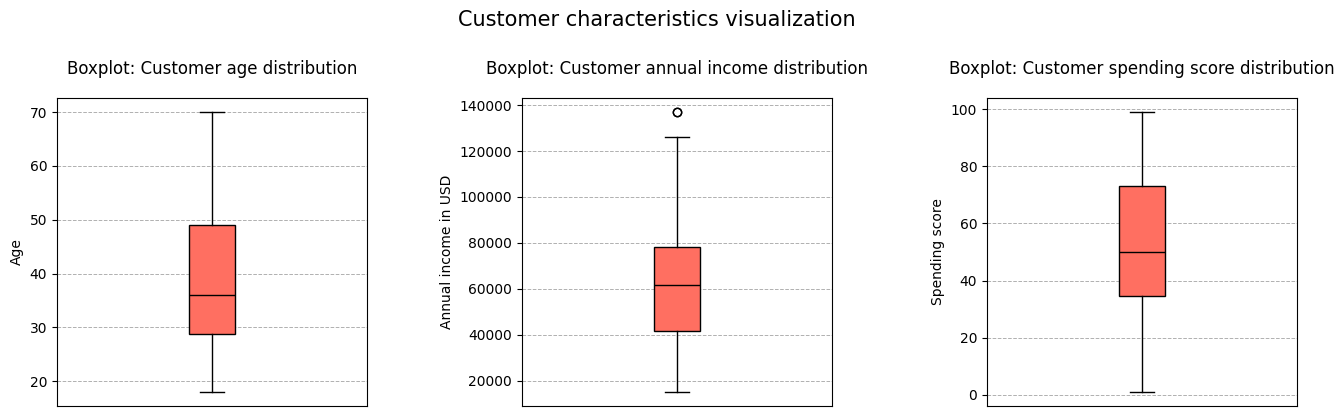

In [71]:
#plotting distribution for each feature
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs = axs.flatten()

#age distribution
box_0 = axs[0].boxplot(df['Age'], medianprops=dict(color='black'), patch_artist=True)
axs[0].set_title("Boxplot: Customer age distribution", y=1.05)
axs[0].set_ylabel("Age")
axs[0].set_xticks([])   
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
for patch in box_0['boxes']:
    patch.set_facecolor(colors[1])  

#income distribution
box_1 = axs[1].boxplot(df['Annual Income ($)'], medianprops=dict(color='black'), patch_artist=True)
axs[1].set_title("Boxplot: Customer annual income distribution", y=1.05)
axs[1].set_ylabel("Annual income in USD")
axs[1].set_xticks([])
axs[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
for patch in box_1['boxes']:
    patch.set_facecolor(colors[1])  

#spending score distribution
box_2 = axs[2].boxplot(df['Spending Score (1-100)'], medianprops=dict(color='black'), patch_artist=True)
axs[2].set_title("Boxplot: Customer spending score distribution", y=1.05)
axs[2].set_ylabel("Spending score")
axs[2].set_xticks([])
axs[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
for patch in box_2['boxes']:
    patch.set_facecolor(colors[1])  

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.7, wspace=0.5)
plt.show()



In [72]:
df.drop(df[df['Annual Income ($)'] > 136000].index, inplace=True)

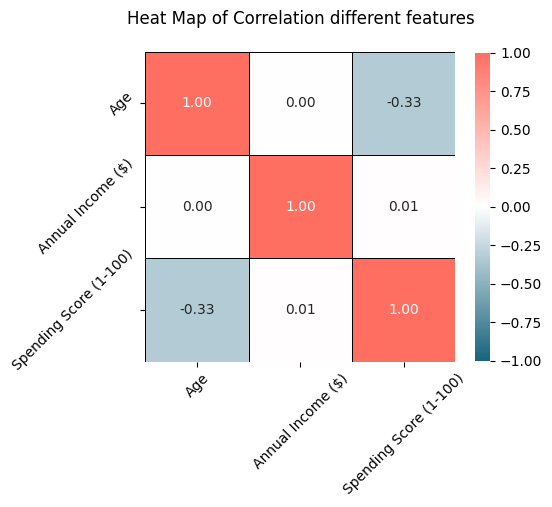

In [73]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

numeric_df = df.select_dtypes(include=[np.number]) #to get only numerical columns
numeric_df.drop(['CustomerID'], axis=1, inplace=True) #drop the ID column
correlation_matrix = numeric_df.corr() #calculate the correlation matrix

my_colors = ['#19647E', '#FFFFFF', '#FF6F61']  # colors for the heatmap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", my_colors) # create a custom color map

#plotting the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Heat Map of Correlation different features', pad=20)
plt.xticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the x-ticks
plt.yticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the y-ticks

plt.show()

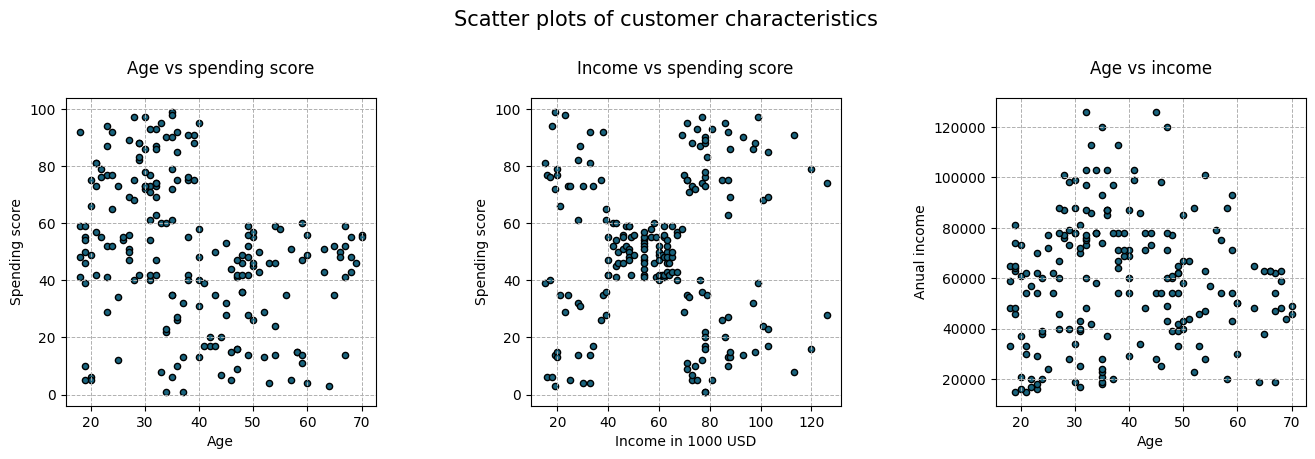

In [74]:
#plotting separate data points on scatter plots
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs = axs.flatten()

#age vs spending score
axs[0].scatter(df['Age'], df['Spending Score (1-100)'], color=colors[0], edgecolor='black', s=20)
axs[0].set_title("Age vs spending score", y=1.05)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending score")
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

#income vs spending score
axs[1].scatter(df['Annual Income ($)']/1000, df['Spending Score (1-100)'], color=colors[0], edgecolor='black', s=20)
axs[1].set_title("Income vs spending score", y=1.05)
axs[1].set_xlabel("Income in 1000 USD")
axs[1].set_ylabel("Spending score")
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

#age vs income
axs[2].scatter(df['Age'], df['Annual Income ($)'], color=colors[0], edgecolor='black', s=20)
axs[2].set_title("Age vs income", y=1.05)
axs[2].set_xlabel("Age")
axs[2].set_ylabel("Anual income")
axs[2].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.suptitle("Scatter plots of customer characteristics", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


<b>Scaling data</b>

In [75]:
from sklearn.preprocessing import MinMaxScaler

#dropping columns that wont be used
df_scaled = df.drop(['CustomerID', 'Age', 'Gender'], axis=1).copy()

#scaling data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns, index=df.index)

In [76]:
df_scaled.head()

,Annual Income ($),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.009009,0.051020
3,0.009009,0.775510
4,0.018018,0.397959


<style>
h3 {
 color: #0078d4
}
</style>
<h3>3. Apply four different clustering algorithms of your choice (e.g., K-means, Hierarchical,
DBSCAN, BIRCH, etc.).</h3>

<style>
h3 {
 color: #0078d4
}
</style>
<h3>Clustering algorithm 1: K-Means Clustering </h3>

After finishing data exploration, I tried different ways of clustering my data. I tried clustering all features, but results were too poorly. I also tried dimensions reduction, using PCA, but results were still bad. <br>
As data exploration showed that there might be some possibilities to cluster features income and spending score, I decided to choose only those 2 features. I experimented with other features as well, but this was the only possible solution that gave satisfactory results.


<h4>Elbow method</h4>

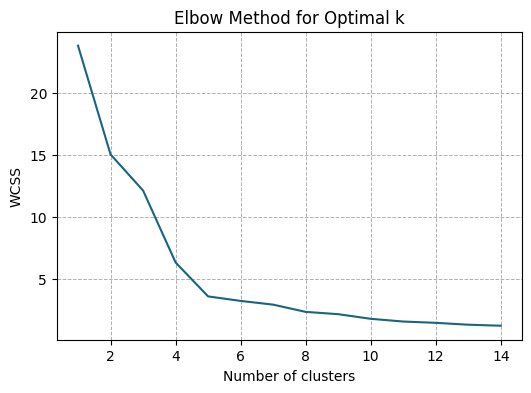

In [77]:
from sklearn.cluster import KMeans

#calculating data for elbow method and showing it on a plot
wcss = [] #wcss is the sum of squared distances of samples to their closest cluster center
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) #inertia_ is the sum of squared distances of samples to their cluster centers

#ploting the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(K, wcss, color=colors[0])
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
plt.show()

In [78]:
#creating  k-means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled) #fits the model and predict the clusters
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled) #adding cluster number to data frame
df['Cluster'] = kmeans.fit_predict(df_scaled) #adding cluster number to data frame

In [79]:
df_scaled.head()

,Annual Income ($),Spending Score (1-100),Cluster
0,0.000000,0.387755,3
1,0.000000,0.816327,2
2,0.009009,0.051020,3
3,0.009009,0.775510,2
4,0.018018,0.397959,3


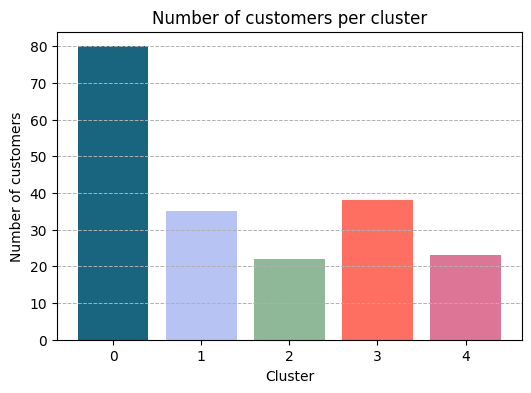

In [80]:
plt.figure(figsize=(6, 4))
#bar plot showing cluster distribution
plt.bar(df['Cluster'].value_counts().index, df['Cluster'].value_counts().values, color=colors)
plt.title('Number of customers per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(np.arange(5), labels=np.arange(5))
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

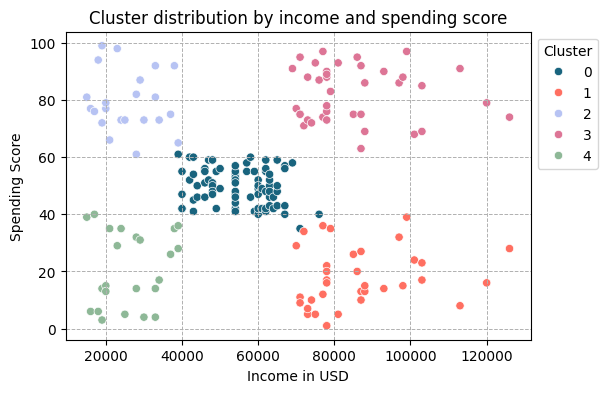

In [81]:
plt.figure(figsize=(6, 4))
colors_kmeaans = colors[:5]
#showing scatterplot that shows data points for each cluster in regards to income and spending data
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_kmeaans)
plt.title('Cluster distribution by income and spending score')
plt.xlabel('Income in USD')
plt.ylabel('Spending Score')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

#display the plot
plt.show()


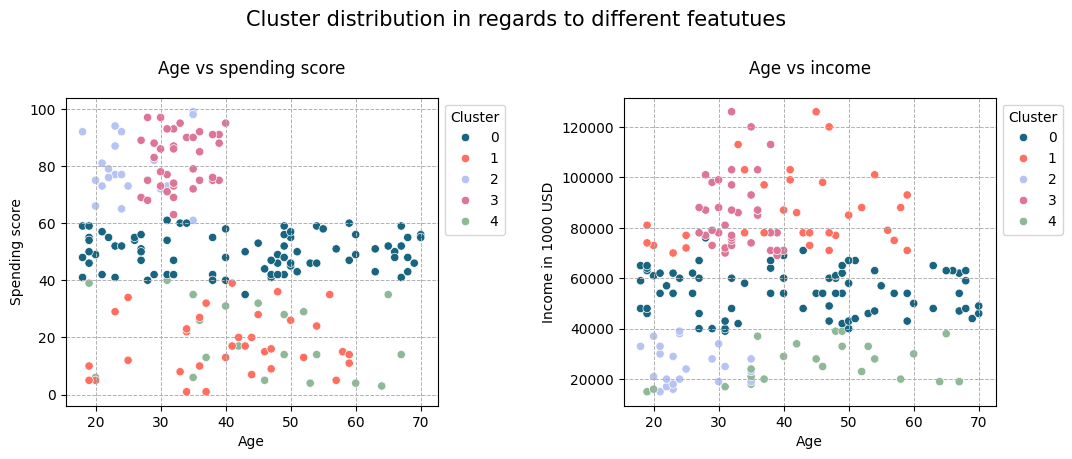

In [82]:
#showing scatterplots that are showing different data points in regards to different features
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_kmeaans, ax=axs[0])
axs[0].set_title("Age vs spending score", y=1.05)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending score")
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[0].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

sns.scatterplot(x='Age', y='Annual Income ($)', data=df, hue='Cluster', palette=colors_kmeaans, ax=axs[1])
axs[1].set_title("Age vs income", y=1.05)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Income in 1000 USD")
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[1].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Cluster distribution in regards to different featutues", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

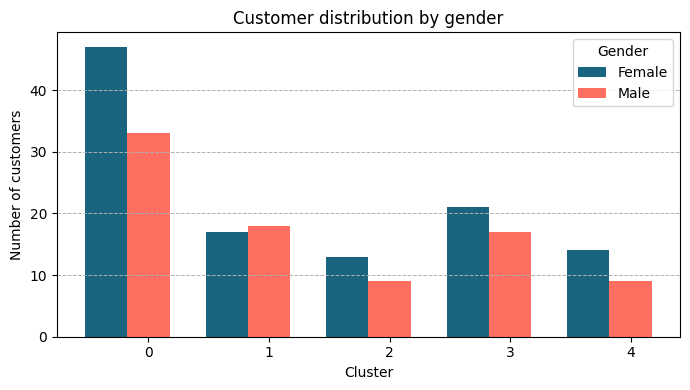

In [83]:
#grouping data
grouped_data = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)

clusters = grouped_data.index #cluster names
genders = grouped_data.columns #gender names
x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(7, 4))
#loop through all genders
for i, gender in enumerate(genders):
    #creates bar chart
    #adjusting position for each gender and group data by gender and showing clusters on x-axis
    plt.bar(x + (i - len(genders)/2) * width, grouped_data[gender], width, label=gender, color=colors[i])

plt.title('Customer distribution by gender')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(x, labels=clusters)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


In [84]:
from sklearn.metrics import silhouette_score

#calculating score
silhouette_score_k_means = silhouette_score(df_scaled, df_scaled['Cluster'])
print(f"Sil. score k-means: {silhouette_score_k_means:.2f}")

Sil. score k-means: 0.85


In [85]:
#droping before new clustering
df = df.drop(['Cluster'], axis=1).copy()
df_scaled = df_scaled.drop(['Cluster'], axis=1).copy()
df_scaled.head()

,Annual Income ($),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.009009,0.051020
3,0.009009,0.775510
4,0.018018,0.397959


<style>
h3 {
 color: #0078d4
}
</style>
<h3>Clustering algorithm 2: DBSCAN </h3>

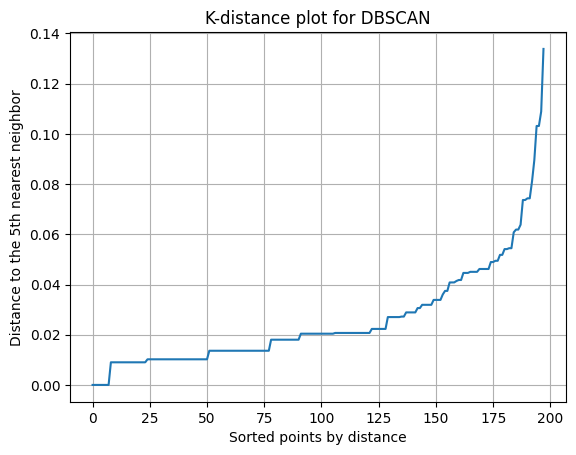

In [86]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=3) # n_neighbors is number of neighbors that are considered
knn.fit(df_scaled) # fitting the model
distances, indices = knn.kneighbors(df_scaled) # calculating the distances and indices of the neighbors
distances = np.sort(distances, axis=0) # sorting the distances
distances = distances[:, 1]
plt.grid()
plt.plot(distances)
plt.xlabel('Sorted points by distance')
plt.ylabel('Distance to the 5th nearest neighbor')
plt.title('K-distance plot for DBSCAN')

plt.show()

Code block that will be used to help me to determine eps

In [87]:
from sklearn.cluster import DBSCAN

"""
#eps start parameter and list of test samples
eps = 0.07
test_samples = [2, 3, 4]
#loop over the test_samples and eps and calculating the number of clusters and noise points
while eps < 3:
    for t in test_samples:
        dbscan = DBSCAN(eps=eps, min_samples=2)
        dbscan.fit(df_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #calculating number clusters and noise points that are labeled as -1
        n_noise = list(labels).count(-1)
        if  n_noise < 30 and n_clusters < 20: #printing only the results with less than 800 noise points
            df['Cluster'] = labels #adding the cluster column to the dataframe
            df["Cluster"].unique() #geting unique values of the cluster column
            print(f"eps: {eps}, min_samples: {t}, number of clusters: {n_clusters}, number of noise points: {n_noise}")
            print (df["Cluster"].value_counts())
    eps += 0.005
    
"""

'\n#eps start parameter and list of test samples\neps = 0.07\ntest_samples = [2, 3, 4]\n#loop over the test_samples and eps and calculating the number of clusters and noise points\nwhile eps < 3:\n    for t in test_samples:\n        dbscan = DBSCAN(eps=eps, min_samples=2)\n        dbscan.fit(df_scaled)\n        labels = dbscan.labels_\n        n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #calculating number clusters and noise points that are labeled as -1\n        n_noise = list(labels).count(-1)\n        if  n_noise < 30 and n_clusters < 20: #printing only the results with less than 800 noise points\n            df[\'Cluster\'] = labels #adding the cluster column to the dataframe\n            df["Cluster"].unique() #geting unique values of the cluster column\n            print(f"eps: {eps}, min_samples: {t}, number of clusters: {n_clusters}, number of noise points: {n_noise}")\n            print (df["Cluster"].value_counts())\n    eps += 0.005\n    \n'

In [88]:
dbscan = DBSCAN(eps=0.09, min_samples=3)
dbscan.fit(df_scaled)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
df['Cluster'] = labels

print(f'Number of clusters: {n_clusters}, Number of noise points: {n_noise}')
df['Cluster'] = labels
df_scaled['Cluster'] = labels
df["Cluster"].unique()
cluster_counts = df["Cluster"].value_counts()
print (cluster_counts)

Number of clusters: 6, Number of noise points: 8
Cluster
 0    96
 4    33
 5    28
 1    18
 2    12
-1     8
 3     3
Name: count, dtype: int64


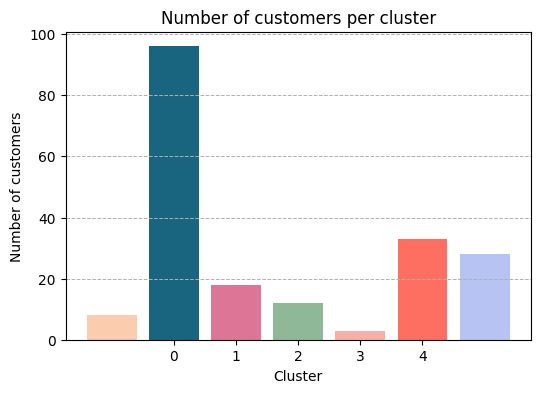

In [89]:
plt.figure(figsize=(6, 4))
#bar plot showing cluster distribution
plt.bar(df['Cluster'].value_counts().index, df['Cluster'].value_counts().values, color=colors)
plt.title('Number of customers per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(np.arange(5), labels=np.arange(5))
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

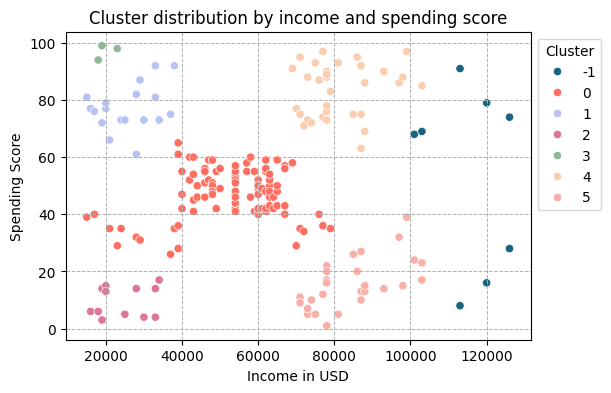

In [90]:
colors_dbscan = colors[:7]
plt.figure(figsize=(6, 4))
#showing scatterplot that shows data points for each cluster in regards to income and spending data
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_dbscan)
plt.title('Cluster distribution by income and spending score')
plt.xlabel('Income in USD')
plt.ylabel('Spending Score')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

#display the plot
plt.show()

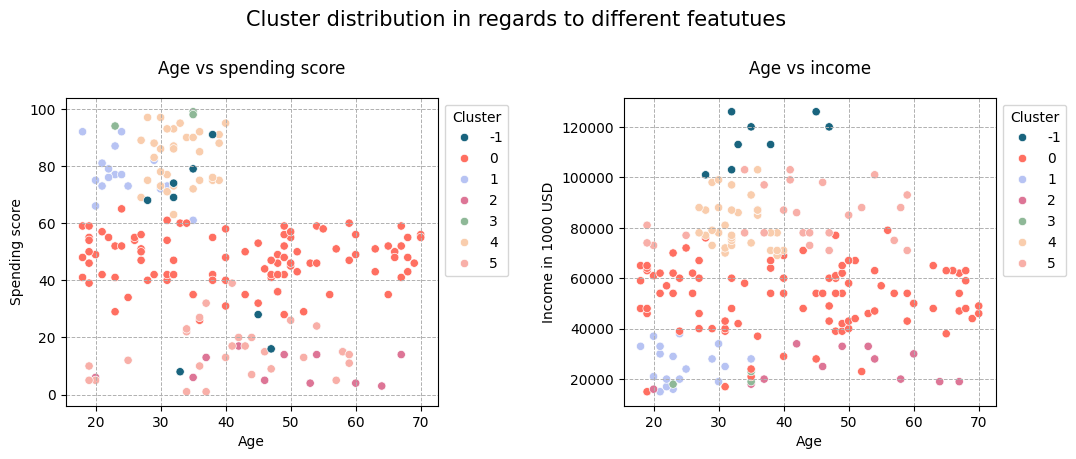

In [91]:
#showing scatterplots that are showing different data points in regards to different features
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_dbscan, ax=axs[0])
axs[0].set_title("Age vs spending score", y=1.05)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending score")
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[0].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

sns.scatterplot(x='Age', y='Annual Income ($)', data=df, hue='Cluster', palette=colors_dbscan, ax=axs[1])
axs[1].set_title("Age vs income", y=1.05)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Income in 1000 USD")
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[1].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Cluster distribution in regards to different featutues", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

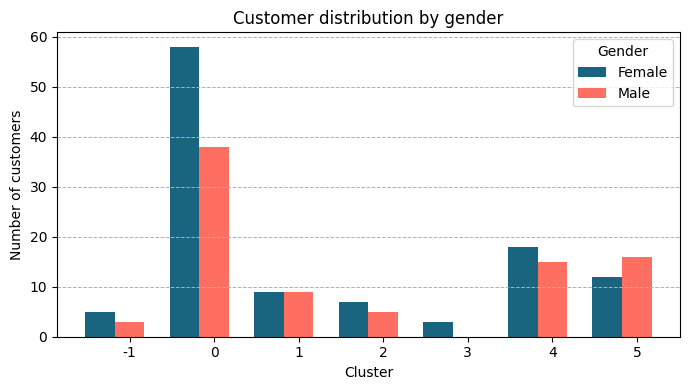

In [92]:
grouped_data = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)

clusters = grouped_data.index #cluster names
genders = grouped_data.columns #gender names
x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(7, 4))
#loop through all genders
for i, gender in enumerate(genders):
    #creates bar chart
    #adjusting position for each gender and group data by gender and showing clusters on x-axis
    plt.bar(x + (i - len(genders)/2) * width, grouped_data[gender], width, label=gender, color=colors[i])

plt.title('Customer distribution by gender')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(x, labels=clusters)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [93]:
#calculating score
silhouette_dbscan = silhouette_score(df_scaled, df_scaled['Cluster'])
print(f"Sil. score dbscan: {silhouette_dbscan:.2f}")

Sil. score dbscan: 0.85


<style>
h3 {
 color: #0078d4
}
</style>
<h3>Clustering algorithm 3: Agglomerative Hierarchical Clustering </h3>

In [94]:
#dropping cluster clumuns before doing new clustering
df = df.drop(['Cluster'], axis=1).copy()
df_scaled = df_scaled.drop(['Cluster'], axis=1).copy()
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


<b>Dendrogram</b>

Dendrogram is a useful tool for determining the number of clusters in a dataset. In agglomerative hierarchical clustering, the clustering process follows a bottom-up approach. This means that the algorithm starts with individual data points, grouping them into small clusters which are then merged into larger clusters until only one cluster remains. The dendrogram provides a visual representation of this process and can help in deciding the appropriate number of clusters needed for analysis. <br>
Vertical distances (lines) represent how different are data point in the respective clusters. <br>
For this case, I will use this method in combination with silhouette score to decide the best number of clusters. <br>


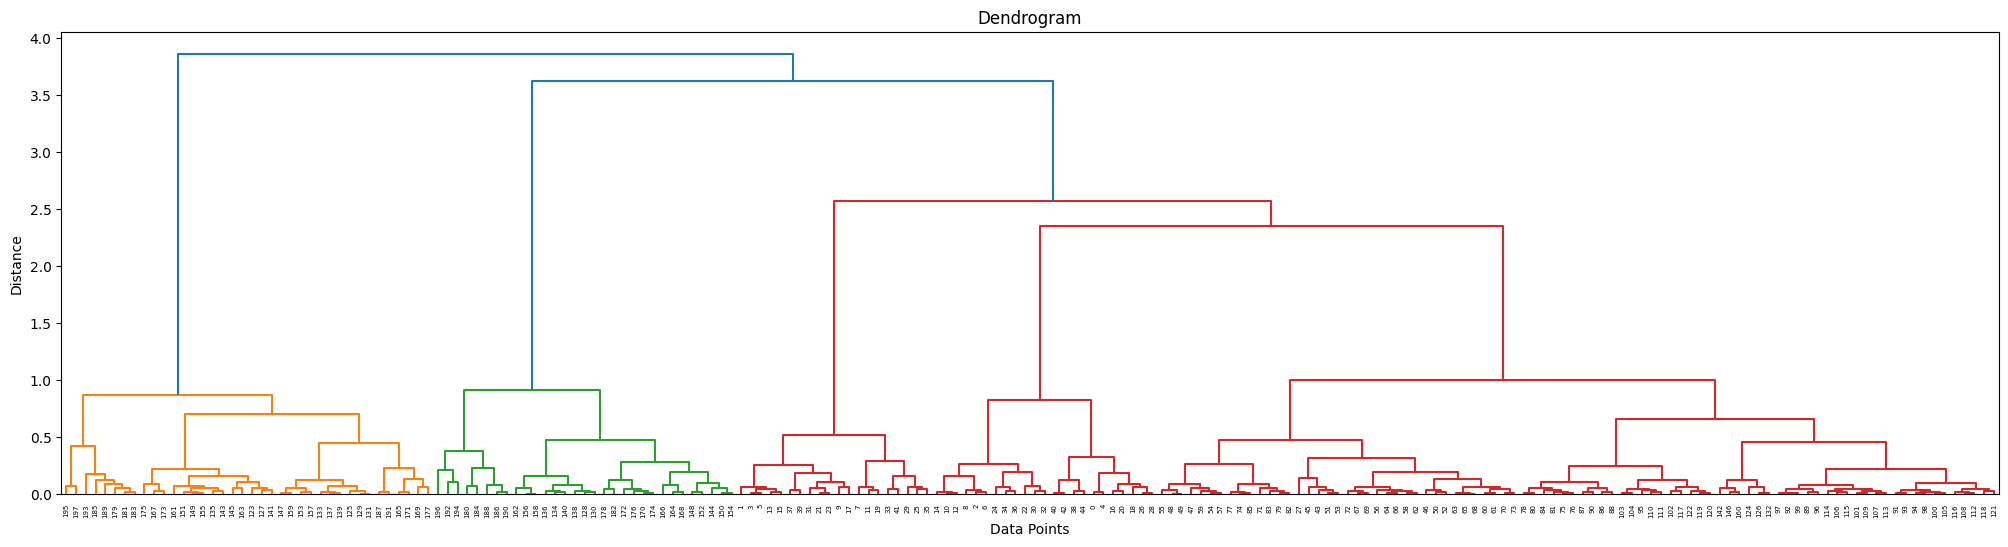

In [95]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#
Z = linkage(df_scaled, 'ward') #linkage is giving distance information, parameter ward means minimazes total warience between all clusters
plt.figure(figsize=(25, 6))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

<b> Silhouette score as tool for deciding number of clusters</b>

In [96]:
#values that will be tested
n = [2, 3, 4, 5, 6, 7, 8, 9, 10]

#looping through those values, applying AgglomerativeClustering for those values, calculating the sil. score and showing it
for i in n: 
    agg_clust = AgglomerativeClustering(n_clusters=i, linkage='ward') #linkage is giving distance information, parameter ward means minimazes total warience between all clusters
    labels = agg_clust.fit_predict(df_scaled)
    df['Cluster'] = labels
    df_scaled['Cluster'] = labels
    silhouette_agg = silhouette_score(df_scaled, df_scaled['Cluster'])
    print(f"Sil. score agg. clust {i} clusters: {silhouette_agg:.2f}")

Sil. score agg. clust 2 clusters: 0.71
Sil. score agg. clust 3 clusters: 0.77
Sil. score agg. clust 4 clusters: 0.81
Sil. score agg. clust 5 clusters: 0.85
Sil. score agg. clust 6 clusters: 0.87
Sil. score agg. clust 7 clusters: 0.87
Sil. score agg. clust 8 clusters: 0.88
Sil. score agg. clust 9 clusters: 0.89
Sil. score agg. clust 10 clusters: 0.89


In [97]:
#droping columns cluster before clustering
df = df.drop(['Cluster'], axis=1).copy()
df_scaled = df_scaled.drop(['Cluster'], axis=1).copy()

It was not very easy to decide optimal number of clusters. From previous clustering algorithms I know that the best value will be 5. However, when applying this algorithm, I intentionally acted as if I don’t have that data. If I had 5 clusters I would get clusters that are similar to when applied k-means. However, as I will ignore that, and use Dendrogram and silhouette score, I made a compromise between those 2 and decided that I want to have 8 clusters.

In [98]:
# applying AgglomerativeClustering with 8 clusters
agg_clust = AgglomerativeClustering(n_clusters=8, linkage='ward') #linkage is giving distance information, parameter ward means minimazes total warience between all clusters
labels = agg_clust.fit_predict(df_scaled)
df['Cluster'] = labels
df_scaled['Cluster'] = labels

Plotting results 

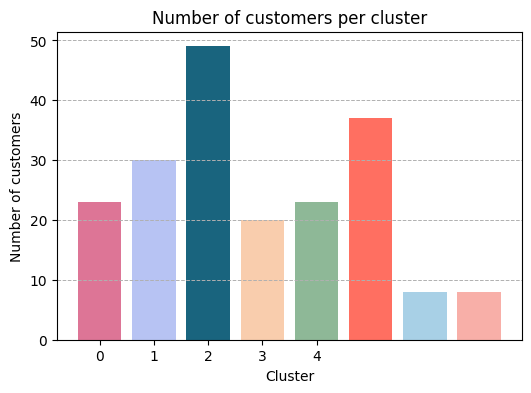

In [99]:
plt.figure(figsize=(6, 4))
#bar plot showing cluster distribution
plt.bar(df['Cluster'].value_counts().index, df['Cluster'].value_counts().values, color=colors)
plt.title('Number of customers per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(np.arange(5), labels=np.arange(5))
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

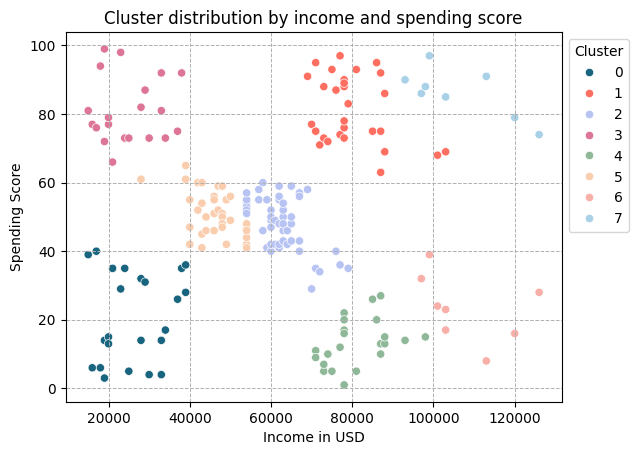

In [100]:
#showing scatterplot that shows data points for each cluster in regards to income and spending data
colors_agg_clust = colors[:8]
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_agg_clust)
plt.title('Cluster distribution by income and spending score')
plt.xlabel('Income in USD')
plt.ylabel('Spending Score')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

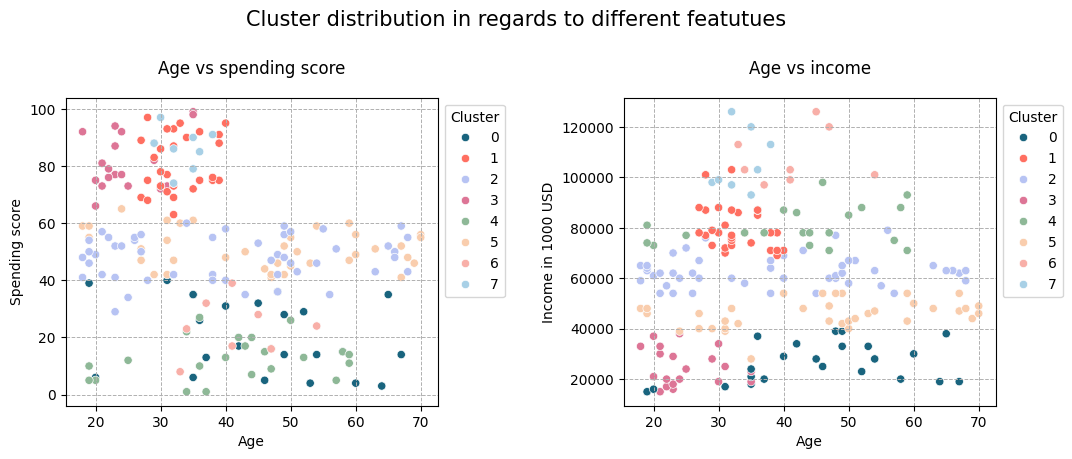

In [101]:
#showing scatterplots that are showing different data points in regards to different features
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_agg_clust, ax=axs[0])
axs[0].set_title("Age vs spending score", y=1.05)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending score")
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[0].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

sns.scatterplot(x='Age', y='Annual Income ($)', data=df, hue='Cluster', palette=colors_agg_clust, ax=axs[1])
axs[1].set_title("Age vs income", y=1.05)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Income in 1000 USD")
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[1].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Cluster distribution in regards to different featutues", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

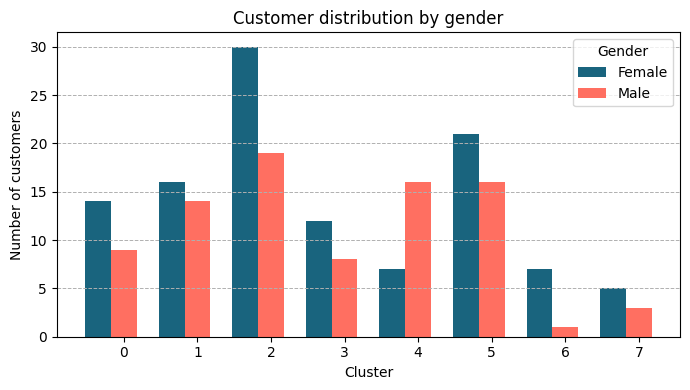

In [102]:
grouped_data = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)

clusters = grouped_data.index #cluster names
genders = grouped_data.columns #gender names
x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(7, 4))
#loop through all genders
for i, gender in enumerate(genders):
    #creates bar chart
    #adjusting position for each gender and group data by gender and showing clusters on x-axis
    plt.bar(x + (i - len(genders)/2) * width, grouped_data[gender], width, label=gender, color=colors[i])

plt.title('Customer distribution by gender')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(x, labels=clusters)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [103]:
#calculating sil. score
silhouette_agg_clust = silhouette_score(df_scaled, df_scaled['Cluster'])
print(f"Sil. score dbscan: {silhouette_agg_clust:.2f}")

Sil. score dbscan: 0.88


<style>
h3 {
 color: #0078d4
}
</style>
<h3>Clustering algorithm 4: Gaussian Mixture Model (GMM) </h3>

In [104]:
#dropping cluster clumuns before doing new clustering
df = df.drop(['Cluster'], axis=1).copy()
df_scaled = df_scaled.drop(['Cluster'], axis=1).copy()

<b>Bayesian Information Criterion</b>

BIC is common method that helps to select number of clusters. It is working that balances model complicity and fit. It favors simpler models. Lowest BIC is a good candidate for number of clusters. If it starts to decrease very slowly, “elbow” point is a best candidate.

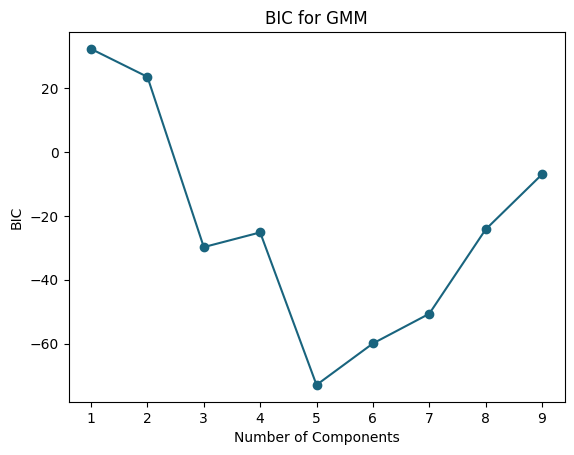

In [105]:
from sklearn.mixture import GaussianMixture
bic = []
n_components_range = range(1, 10)

#looping through number of components, in this case 1-10 and fitting the model
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42).fit(df_scaled)
    bic.append(gmm.bic(df_scaled))

#ploting results
plt.plot(n_components_range, bic, marker='o', color= colors[0])
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC for GMM')
plt.show()


<b>Applying the model</b>

In [106]:
# Create and fit the model with 5 complonets
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(df_scaled)
labels = gmm.predict(df_scaled)
probabilities = gmm.predict_proba(df_scaled)

df['Cluster'] = labels
df_scaled['Cluster'] = labels

Plotting results

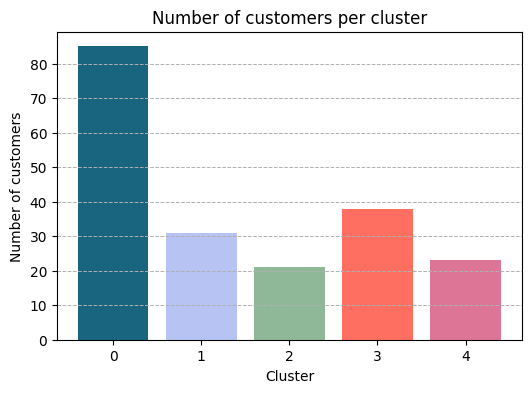

In [107]:
plt.figure(figsize=(6, 4))
#bar plot showing cluster distribution
plt.bar(df['Cluster'].value_counts().index, df['Cluster'].value_counts().values, color=colors)
plt.title('Number of customers per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(np.arange(5), labels=np.arange(5))
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

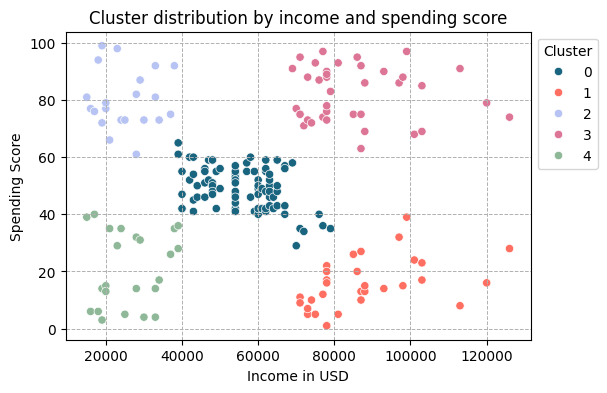

In [108]:
plt.figure(figsize=(6, 4))
colors_kmeaans = colors[:5]
#showing scatterplot that shows data points for each cluster in regards to income and spending data
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_kmeaans)
plt.title('Cluster distribution by income and spending score')
plt.xlabel('Income in USD')
plt.ylabel('Spending Score')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

#display the plot
plt.show()

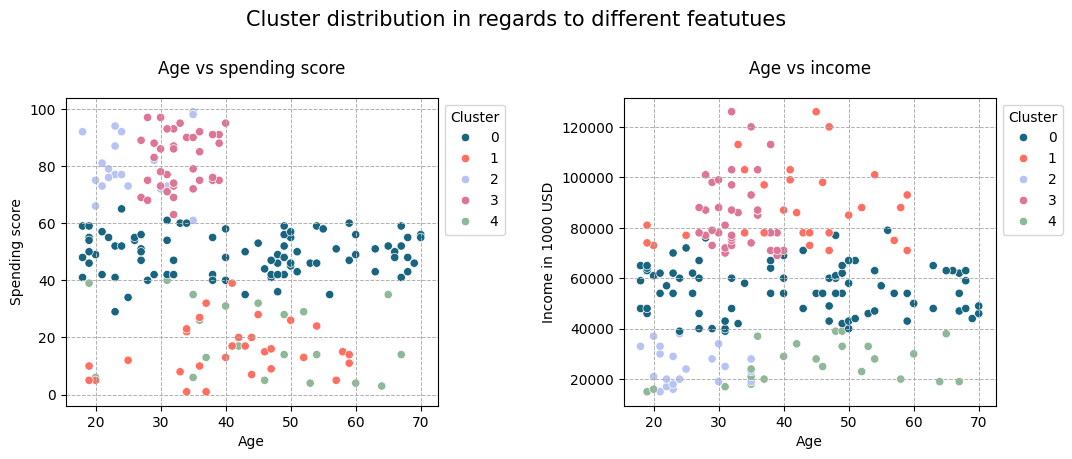

In [109]:
#showing scatterplots that are showing different data points in regards to different features
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_kmeaans, ax=axs[0])
axs[0].set_title("Age vs spending score", y=1.05)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending score")
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[0].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

sns.scatterplot(x='Age', y='Annual Income ($)', data=df, hue='Cluster', palette=colors_kmeaans, ax=axs[1])
axs[1].set_title("Age vs income", y=1.05)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Income in 1000 USD")
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[1].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Cluster distribution in regards to different featutues", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

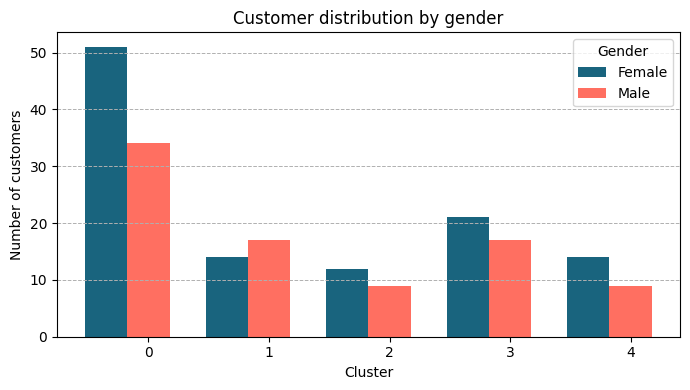

In [110]:
grouped_data = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)

clusters = grouped_data.index #cluster names
genders = grouped_data.columns #gender names
x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(7, 4))
#loop through all genders
for i, gender in enumerate(genders):
    #creates bar chart
    #adjusting position for each gender and group data by gender and showing clusters on x-axis
    plt.bar(x + (i - len(genders)/2) * width, grouped_data[gender], width, label=gender, color=colors[i])

plt.title('Customer distribution by gender')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(x, labels=clusters)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [111]:
#calculating score
silhouette_score_gmm = silhouette_score(df_scaled, df_scaled['Cluster'])
print(f"Sil. score gmm: {silhouette_score_gmm:.2f}")

Sil. score gmm: 0.85


<style>
h3 {
 color: #0078d4
}
</style>
<h3>4. Evaluate the performance of each clustering algorithm using relevant metrics (e.g.,
silhouette score, etc.) </h3>

In [112]:
metrics = pd.DataFrame({
    'Method': ['K-Means', 'DBSCAN', 'Agglomerative Hierarchical Clustering', 'GMM'],
    'Silhouette score': [silhouette_score_k_means, silhouette_dbscan, silhouette_agg_clust, silhouette_score_gmm],
})
metrics.head()

,Method,Silhouette score
0,K-Means,0.851399
1,DBSCAN,0.847510
2,Agglomerative Hierarchical Clustering,0.879121
3,GMM,0.853262


<style>
h3 {
 color: #0078d4
}
</style>
<h3>5. Discuss the strengths and weaknesses of each clustering algorithm in the context of the
given dataset</h3>

<h4> K-Means Clustering</h4>
<ul><b>Positive</b>
<li>It was very easy to implement it as the problem is easy</li>
<li>Tolls like elbow method are very easy to implement and they are showing us number of clusters</li>
</ul>
<ul>
    <b>Negative</b>
    <li>It would be more dificult to work with this methos if the problem would be more complex</li>
    <li>It is very sensitive to outliers</li>
    <li>When I tested to cluster all features, results very bad.</li>
</ul>

<p>My conclusion: I got satisfactory results, when using only 2 features in clustering. Clusters are in general very well divided, with few exceptions</p>


<h4>DBSCAN</h4>

<ul>
    <b>Positive</b>
    <li>It would perform better with outlier than the previous clustering method</li>
</ul>
<ul>
    <b>Negative</b>
    <li>It is very difficult to implements, it is very tricky to chose best eps and min_sample values</li>
    <li>Clusters are not nicely divided</li>
    <li>Tools like K-distance don't give satisfactory results to decide eps value</li>
</ul>

<p>My conclusion: Despite getting good results, plots show that data point are not nicely divided. It was also difficult to work with it. </p>

<h4>Agglomerative Hierarchical Clustering</h4>

<ul>
    <b>Positive</b>
    <li>Tools like Dendrogram are very helpful to see how different data points inside each cluster are different from each other</li>
    <li>It is fairly easy to implement it for this problem</li>
</ul>
<ul>
    <b>Negative</b>
    <li>As much as helpful, using only Dendrogram it would not give best results</li>
    <li>Data points are not perfectly divided</li>

</ul>


<h4>Gaussian Mixture Models (GMM)</h4>

<ul>
    <b>Positive</b>
    <li>For this problem I used tool BIC in order to determine number of clusters and I got great results</li>
    <li>Very simple to implement</li>
    <li>Data points best separated</li>
</ul>
<ul>
    <b>Negative</b>
    <li>I didn’t see any negative aspects while working with this method. Maybe it's more challenging if data set was more complex</li>

</ul>


<style>
h3 {
 color: #0078d4
}
</style>
<h3>6. Discuss your findings and propose potential applications or further steps based on
your results</h3>

<p>My conclusion is that all 4 methods gave very good results. A reason for that could be that I used only 2 features, that I discovered while performing data exploration. When testing to cluster all features results very poorly. </p>
<p>Choosing right number of components has been proved as the most difficult task and it is the aspect that affects performance the most</p>
<p>For further steps I would suggest to explore clustering all features with all those methods and to try to get as best results as possible</p>
<p>Those results can be implemented for example when planning marketing campaigns and when companies want to target specific groups of customers</p>
